#### Approach
* After validating the data I'v started the exploratory data analysis which included univariate analysis,sample statistics and sample distribution.
* Then I moved to bi-variate analysis analyzing each variable against the target variabl (Heart disease).
* All of these analysis have been interpreted into visuals to gather insights easily
* Lastly,Instead of One-Hot Encoding, I made correlation by computing a relevant measure of association between each and every feature, and plot it all as an easy-to-read heat-map 

#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from importlib import reload
from dython.nominal import associations
plt=reload(plt)
pd.options.mode.chained_assignment = None

#### Data Importing

In [2]:
heart=pd.read_csv("heart_2020_cleaned.csv")

#### Review the Data

In [9]:
heart.head(8)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No


In [4]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

#### Statistics Summary

In [10]:
heart.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [11]:
heart.describe(include="O")

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795
unique,2,2,2,2,2,2,13,6,4,2,5,2,2,2
top,No,No,No,No,No,Female,65-69,White,No,Yes,Very good,No,No,No
freq,292422,187887,298018,307726,275385,167805,34151,245212,269653,247957,113858,276923,308016,289976


#### univariate analysis

* Heart disease

Text(0.5, 1.0, 'Percentage of people with heart disease')

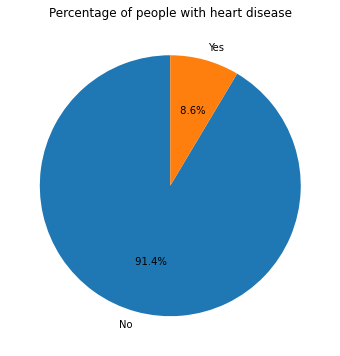

In [12]:
fig,ax=plt.subplots(figsize=(6,6))
plt.pie(x=heart["HeartDisease"].value_counts(),labels=heart["HeartDisease"].unique(),
        autopct="% 1.1f%%",startangle=90)
plt.title("Percentage of people with heart disease")


* BMI

Text(0.5, 1.0, 'BMI Density plot')

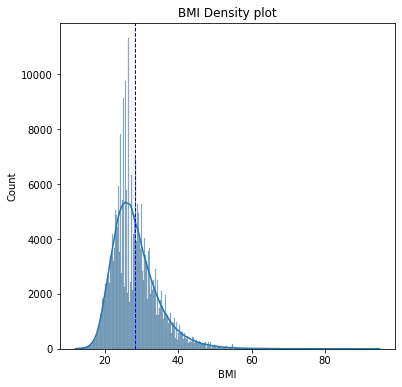

In [13]:
fig,ax=plt.subplots(figsize=(6,6))
sns.histplot(heart["BMI"],kde=True)
plt.axvline(heart["BMI"].mean(), color='b', linestyle='dashed', linewidth=1)
plt.title("BMI Density plot")

* Smoking

Text(0.5, 1.0, 'Percentage of Smoking people')

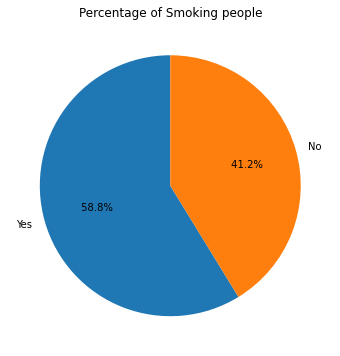

In [14]:
fig,ax=plt.subplots(figsize=(6,6))
plt.pie(x=heart["Smoking"].value_counts(),labels=heart["Smoking"].unique(),
        autopct="% 1.1f%%",startangle=90)
plt.title("Percentage of Smoking people")

* Alcohol Drinking (Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)

Text(0.5, 1.0, 'Percentage of alcohol-heavy drinkers')

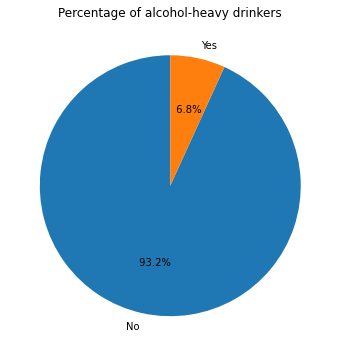

In [15]:
fig,ax=plt.subplots(figsize=(6,6))
plt.pie(x=heart["AlcoholDrinking"].value_counts(),labels=heart["AlcoholDrinking"].unique(),
        autopct="% 1.1f%%",startangle=90)
plt.title("Percentage of alcohol-heavy drinkers")

* Stroke

Text(0.5, 1.0, 'Percentage of people who had stroke')

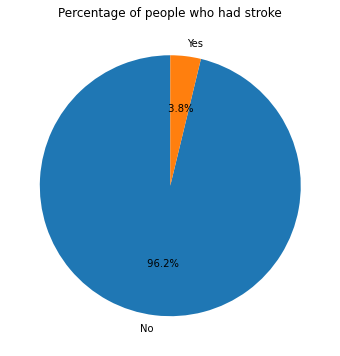

In [16]:
fig,ax=plt.subplots(figsize=(6,6))
plt.pie(x=heart["Stroke"].value_counts(),labels=heart["Stroke"].unique(),
        autopct="% 1.1f%%",startangle=90)
plt.title("Percentage of people who had stroke")

* physical health, which includes physical illness and injury, how many days during the past 30 days was your physical health not good

Text(0.5, 0, 'PhysicalHealth Score ')

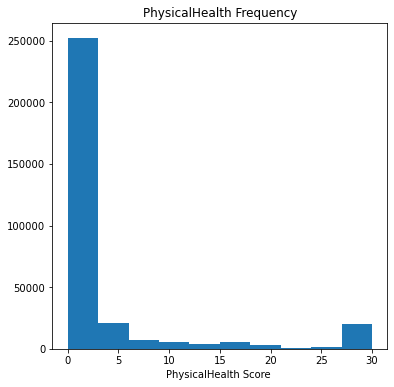

In [17]:
fig,ax=plt.subplots(figsize=(6,6))
plt.hist(heart["PhysicalHealth"])
plt.title("PhysicalHealth Frequency")
plt.xlabel("PhysicalHealth Score ")

* mental health, for how many days during the past 30 days was your mental health not good?

Text(0.5, 0, 'MentallHealth Score ')

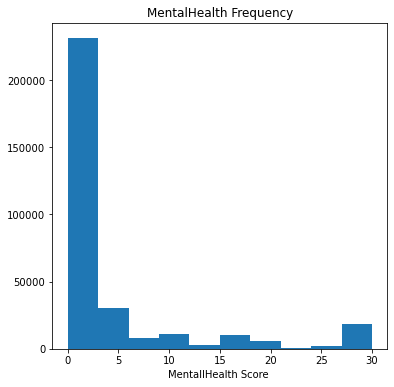

In [18]:
fig,ax=plt.subplots(figsize=(6,6))
plt.hist(heart["MentalHealth"])
plt.title("MentalHealth Frequency")
plt.xlabel("MentallHealth Score ")

* Difficulties Walking

Text(0.5, 1.0, 'Percentage of people who have Difficulties Walking')

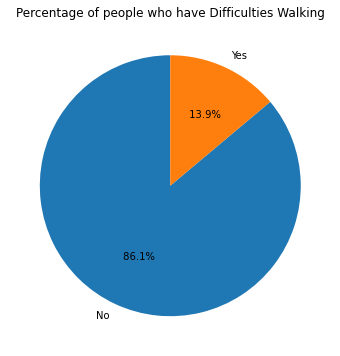

In [19]:
fig,ax=plt.subplots(figsize=(6,6))
plt.pie(x=heart["DiffWalking"].value_counts(),labels=heart["DiffWalking"].unique(),
        autopct="% 1.1f%%",startangle=90)
plt.title("Percentage of people who have Difficulties Walking")

* Sex

Text(0.5, 1.0, 'Gender')

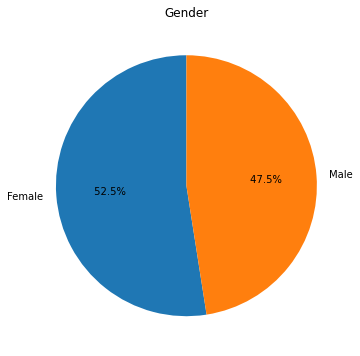

In [20]:
fig,ax=plt.subplots(figsize=(6,6))
plt.pie(x=heart["Sex"].value_counts(),labels=heart["Sex"].unique(),
        autopct="% 1.1f%%",startangle=90)
plt.title("Gender")

* Age Category

Text(0.5, 0, 'Age group')

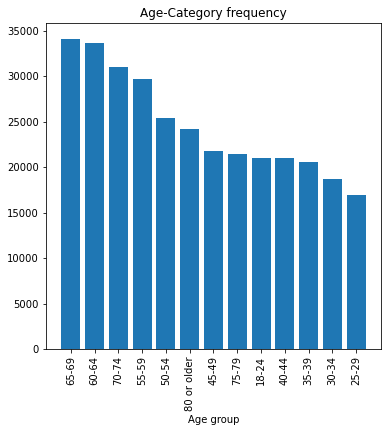

In [21]:
age_group=pd.DataFrame(heart["AgeCategory"].value_counts().sort_values(ascending=False))
age_group.columns=["Frequency"]
fig,ax=plt.subplots(figsize=(6,6))
plt.bar(x=age_group.index,height=age_group["Frequency"])
plt.xticks(rotation="vertical")
plt.title("Age-Category frequency")
plt.xlabel("Age group")

* Race 	

Text(0.5, 1.0, 'Race')

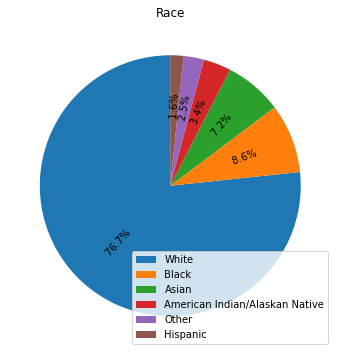

In [22]:
fig,ax=plt.subplots(figsize=(6,6))
patches, labels, pct_texts=plt.pie(x=heart["Race"].value_counts(),
        autopct="% 1.1f%%",
        startangle=90,rotatelabels = 270)
for label, pct_text in zip(labels, pct_texts):
    pct_text.set_rotation(label.get_rotation())
plt.legend(heart["Race"].unique(), loc="lower right")

plt.title("Race")

* Diabetic

Text(0.5, 1.0, 'Percentage of Diabetic people')

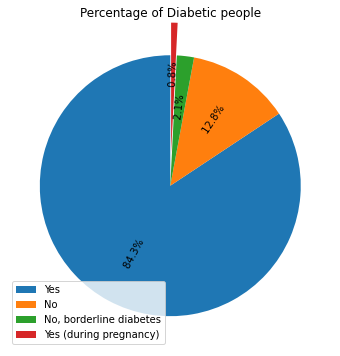

In [23]:
fig,ax=plt.subplots(figsize=(6,6))
explode = (0, 0, 0, 0.25)
patches, labels, pct_texts=plt.pie(x=heart["Diabetic"].value_counts(),
        autopct="% 1.1f%%",startangle=90,rotatelabels = 270,explode=explode)
for label, pct_text in zip(labels, pct_texts):
    pct_text.set_rotation(label.get_rotation())
plt.legend(heart["Diabetic"].unique(), loc="lower left")
plt.title("Percentage of Diabetic people")

* PhysicalActivity

Text(0.5, 1.0, 'People doing Physical Activities')

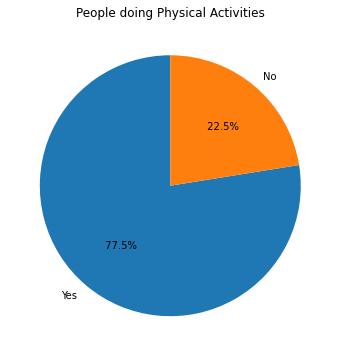

In [24]:
fig,ax=plt.subplots(figsize=(6,6))
plt.pie(x=heart["PhysicalActivity"].value_counts(),labels=heart["PhysicalActivity"].unique(),
        autopct="% 1.1f%%",startangle=90)
plt.title("People doing Physical Activities")

* General Health

Text(0.5, 1.0, 'General Health')

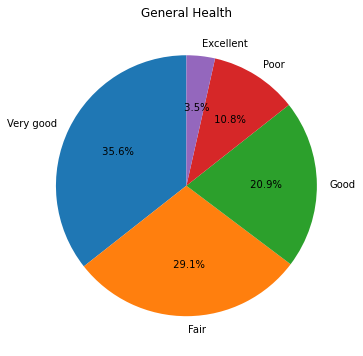

In [25]:
fig,ax=plt.subplots(figsize=(6,6))
plt.pie(x=heart["GenHealth"].value_counts(),labels=heart["GenHealth"].unique(),
        autopct="% 1.1f%%",startangle=90)
plt.title("General Health")

* Sleeping time

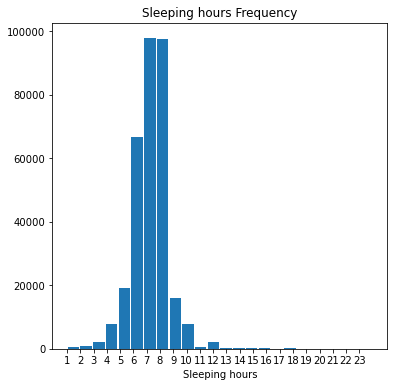

In [26]:
fig,ax=plt.subplots(figsize=(6,6))
plt.hist(heart["SleepTime"],bins=24,rwidth=0.9)
plt.title("Sleeping hours Frequency")
plt.xlabel("Sleeping hours")
plt.xticks(range(1, 24));

* Asthma

Text(0.5, 1.0, 'Percentage of Asthmatic people')

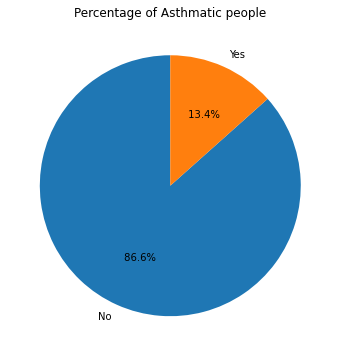

In [27]:
fig,ax=plt.subplots(figsize=(6,6))
plt.pie(x=heart["Asthma"].value_counts(),labels=["No","Yes"],
        autopct="% 1.1f%%",startangle=90)
plt.title("Percentage of Asthmatic people")

KidneyDisease

Text(0.5, 1.0, 'Percentage of people with Kidney Disease')

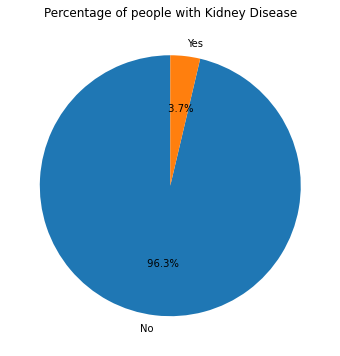

In [28]:
fig,ax=plt.subplots(figsize=(6,6))
plt.pie(x=heart["KidneyDisease"].value_counts(),labels=["No","Yes"],
        autopct="% 1.1f%%",startangle=90)
plt.title("Percentage of people with Kidney Disease")

* SkinCancer

Text(0.5, 1.0, 'Percentage of people who had SkinCancer')

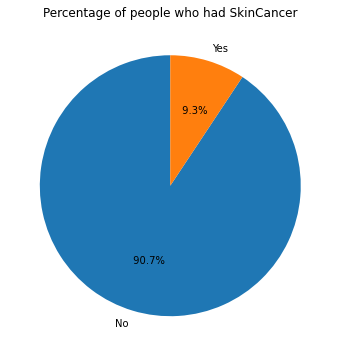

In [29]:
fig,ax=plt.subplots(figsize=(6,6))
plt.pie(x=heart["SkinCancer"].value_counts(),labels=["No","Yes"],
        autopct="% 1.1f%%",startangle=90)
plt.title("Percentage of people who had SkinCancer")

#### Multivariate analysis

* Heart Disease and	BMI

In [30]:
bins = 10
edges = np.linspace(heart.BMI.min(), heart.BMI.max(), bins+1).astype(int)
labels = [f'({edges[i]}, {edges[i+1]})' for i in range(bins)]
BMI_Heart=heart.copy()
BMI_Heart["BMI ranges"]=pd.cut(BMI_Heart.BMI,bins=bins,labels=labels)
BMI_heart=pd.DataFrame(BMI_Heart.groupby("BMI ranges")["HeartDisease"].value_counts())
BMI_h=pd.crosstab(BMI_Heart["BMI ranges"],BMI_Heart["HeartDisease"])
BMI_h


HeartDisease,No,Yes
BMI ranges,,
"(12, 20)",16147,1137
"(20, 28)",159186,12920
"(28, 36)",90772,10091
"(36, 45)",20785,2542
"(45, 53)",4348,540
"(53, 61)",840,97
"(61, 70)",228,33
"(70, 78)",78,9
"(78, 86)",25,4


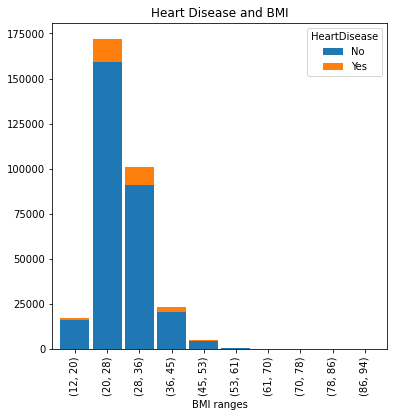

In [31]:
BMI_r=pd.crosstab(BMI_Heart["BMI ranges"],BMI_Heart["HeartDisease"]).reset_index()
ax=BMI_r.plot(x="BMI ranges",kind='bar', stacked=True,
        title='Heart Disease and BMI',figsize=(6,6),width=0.9)


* Heart Disease and Smoking

In [32]:
H_Smoking=pd.DataFrame(pd.crosstab(heart["HeartDisease"],heart["Smoking"],normalize="index"))
H_Smoking

Smoking,No,Yes
HeartDisease,,
No,0.603754,0.396246
Yes,0.414131,0.585869


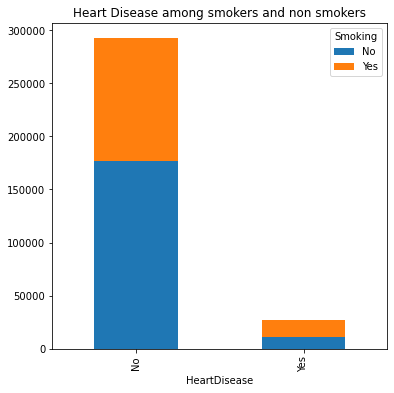

In [33]:
H_S=pd.DataFrame(pd.crosstab(heart["HeartDisease"],heart["Smoking"])).reset_index()
ax=H_S.plot(x="HeartDisease",kind='bar', stacked=True,
        title='Heart Disease among smokers and non smokers',figsize=(6,6))


* Heart Disease and Alcohol Drinking

In [34]:
H_alcohol=pd.DataFrame(pd.crosstab(heart["HeartDisease"],heart["AlcoholDrinking"],normalize="index"))
H_alcohol

AlcoholDrinking,No,Yes
HeartDisease,,
No,0.929431,0.070569
Yes,0.958317,0.041683


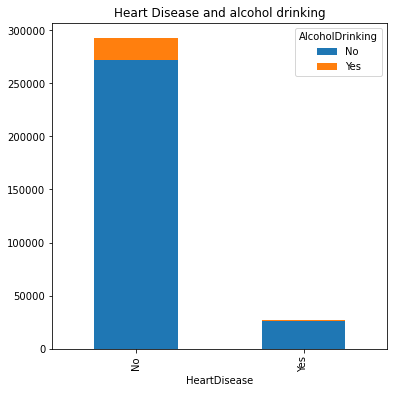

In [35]:
H_alco=pd.DataFrame(pd.crosstab(heart["HeartDisease"],heart["AlcoholDrinking"])).reset_index()
ax=H_alco.plot(x="HeartDisease",kind='bar', stacked=True,
        title='Heart Disease and alcohol drinking',figsize=(6,6))

* Heart disease and recorded Stroke

In [36]:
H_Stroke=pd.DataFrame(pd.crosstab(heart["HeartDisease"],heart["Stroke"],normalize="index"))
H_Stroke

Stroke,No,Yes
HeartDisease,,
No,0.973737,0.026263
Yes,0.839660,0.160340


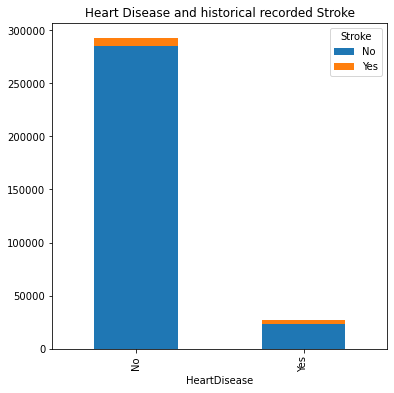

In [37]:
H_stroke=pd.DataFrame(pd.crosstab(heart["HeartDisease"],heart["Stroke"])).reset_index()
ax=H_stroke.plot(x="HeartDisease",kind='bar', stacked=True,
        title='Heart Disease and historical recorded Stroke',figsize=(6,6))

* Heart disease and PhysicalHealth

In [38]:
bins = 10
edges = np.linspace(heart.PhysicalHealth.min(), heart.PhysicalHealth.max(), bins+1).astype(int)
labels = [f'({edges[i]}, {edges[i+1]})' for i in range(bins)]
Phys_Heart=heart.copy()
Phys_Heart["phys.Score"]=pd.cut(Phys_Heart.PhysicalHealth,bins=bins,labels=labels)
phys_heart=pd.DataFrame(Phys_Heart.groupby("phys.Score")["HeartDisease"].value_counts())
phys_h=pd.crosstab(Phys_Heart["phys.Score"],Phys_Heart["HeartDisease"])
phys_h


HeartDisease,No,Yes
phys.Score,,
"(0, 3)",243536,17039
"(3, 6)",11781,1563
"(6, 9)",5111,622
"(9, 12)",5192,951
"(12, 15)",6744,1252
"(15, 18)",337,75
"(18, 21)",3128,749
"(21, 24)",160,42
"(24, 27)",1060,294


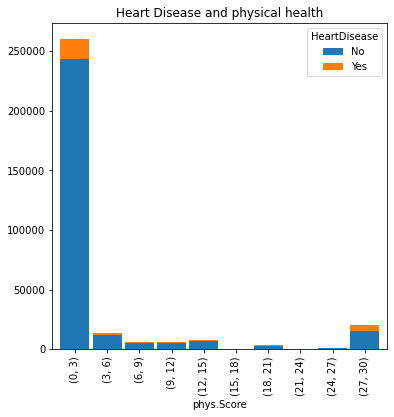

In [39]:
phys_r=pd.crosstab(Phys_Heart["phys.Score"],Phys_Heart["HeartDisease"]).reset_index()
ax=phys_r.plot(x="phys.Score",kind='bar', stacked=True,
        title='Heart Disease and physical health',figsize=(6,6),width=0.9)

* Heart disease and MentalHealth

In [40]:
bins = 10
edges = np.linspace(heart.MentalHealth.min(), heart.MentalHealth.max(), bins+1).astype(int)
labels = [f'({edges[i]}, {edges[i+1]})' for i in range(bins)]
Mental_Heart=heart.copy()
Mental_Heart["mental.Score"]=pd.cut(Mental_Heart.MentalHealth,bins=bins,labels=labels)
mental_heart=pd.DataFrame(Mental_Heart.groupby("mental.Score")["HeartDisease"].value_counts())
mental_h=pd.crosstab(Mental_Heart["mental.Score"],Mental_Heart["HeartDisease"])
mental_h

HeartDisease,No,Yes
mental.Score,,
"(0, 3)",221126,20527
"(3, 6)",19721,1317
"(6, 9)",6417,408
"(9, 12)",10477,876
"(12, 15)",10993,1061
"(15, 18)",449,42
"(18, 21)",5277,527
"(21, 24)",211,22
"(24, 27)",1928,211


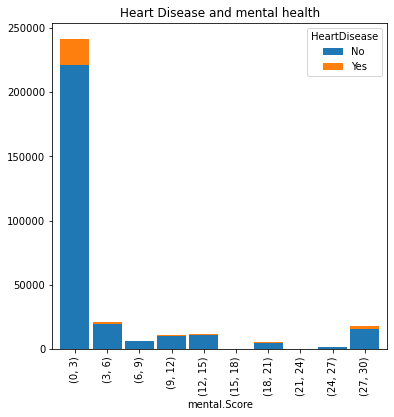

In [41]:
mental_r=pd.crosstab(Mental_Heart["mental.Score"],Mental_Heart["HeartDisease"]).reset_index()
ax=mental_r.plot(x="mental.Score",kind='bar', stacked=True,
        title='Heart Disease and mental health',figsize=(6,6),width=0.9)

* HeartDisease and DiffWalking

In [42]:
H_DiffWalk=pd.DataFrame(pd.crosstab(heart["HeartDisease"],heart["DiffWalking"],normalize="index"))
H_DiffWalk

DiffWalking,No,Yes
HeartDisease,,
No,0.882423,0.117577
Yes,0.633654,0.366346


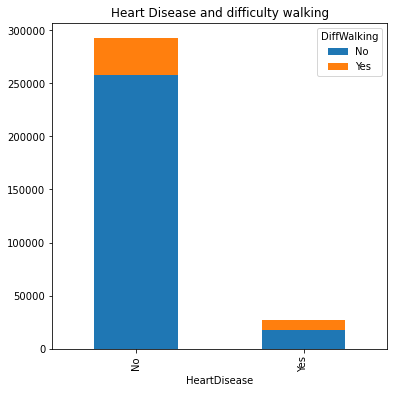

In [43]:
H_diff=pd.DataFrame(pd.crosstab(heart["HeartDisease"],heart["DiffWalking"])).reset_index()
ax=H_diff.plot(x="HeartDisease",kind='bar', stacked=True,
        title='Heart Disease and difficulty walking',figsize=(6,6))

* HeartDisease and Sex

In [44]:
H_Sex=pd.DataFrame(pd.crosstab(heart["HeartDisease"],heart["Sex"],normalize="index"))
H_Sex

Sex,Female,Male
HeartDisease,,
No,0.535428,0.464572
Yes,0.410404,0.589596


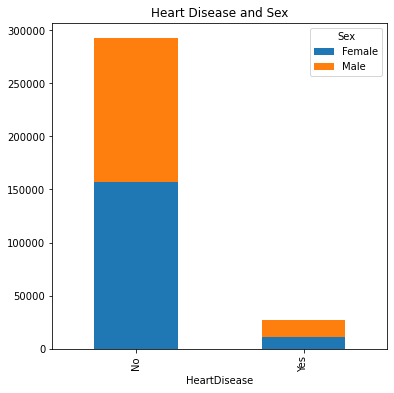

In [45]:
H_sex=pd.DataFrame(pd.crosstab(heart["HeartDisease"],heart["Sex"])).reset_index()
ax=H_sex.plot(x="HeartDisease",kind='bar', stacked=True,
        title='Heart Disease and Sex',figsize=(6,6))

* Heart disease and Age Category

In [46]:
age_g=pd.DataFrame(pd.crosstab(heart["AgeCategory"],heart["HeartDisease"]))
age_g

HeartDisease,No,Yes
AgeCategory,,
18-24,20934,130
25-29,16822,133
30-34,18527,226
35-39,20254,296
40-44,20520,486
45-49,21047,744
50-54,23999,1383
55-59,27555,2202
60-64,30359,3327


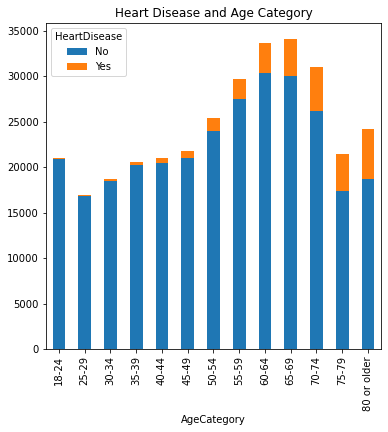

In [47]:
age_h=pd.DataFrame(pd.crosstab(heart["AgeCategory"],heart["HeartDisease"])).reset_index()
ax=age_h.plot(x="AgeCategory",kind='bar', stacked=True,
        title='Heart Disease and Age Category',figsize=(6,6))

* Heart disease and Race

In [48]:
H_Race=pd.DataFrame(pd.crosstab(heart["HeartDisease"],heart["Race"],normalize="index"))
H_Race

Race,American Indian/Alaskan Native,Asian,Black,Hispanic,Other,White
HeartDisease,,,,,,
No,0.015936,0.026681,0.072532,0.088923,0.034341,0.761588
Yes,0.019801,0.009718,0.063164,0.052716,0.032368,0.822234


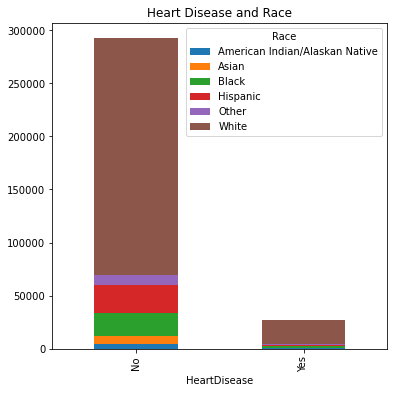

In [49]:
H_race=pd.DataFrame(pd.crosstab(heart["HeartDisease"],heart["Race"])).reset_index()
ax=H_race.plot(x="HeartDisease",kind='bar', stacked=True,
        title='Heart Disease and Race',figsize=(6,6))

* Heart Disease and Diabetic

In [50]:
H_Diabetic=pd.DataFrame(pd.crosstab(heart["HeartDisease"],heart["Diabetic"],normalize="index"))
H_Diabetic

Diabetic,No,"No, borderline diabetes",Yes,Yes (during pregnancy)
HeartDisease,,,,
No,0.862227,0.020491,0.108901,0.008382
Yes,0.640010,0.028824,0.327220,0.003945


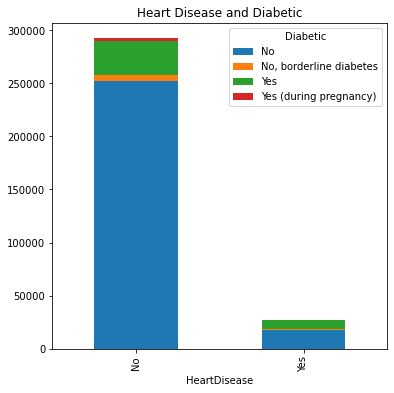

In [51]:
H_diabetic=pd.DataFrame(pd.crosstab(heart["HeartDisease"],heart["Diabetic"])).reset_index()
ax=H_diabetic.plot(x="HeartDisease",kind='bar', stacked=True,
        title='Heart Disease and Diabetic',figsize=(6,6))

* Heart Disease and PhysicalActivity

In [52]:
H_Physical=pd.DataFrame(pd.crosstab(heart["HeartDisease"],heart["PhysicalActivity"],normalize="index"))
H_Physical

PhysicalActivity,No,Yes
HeartDisease,,
No,0.211865,0.788135
Yes,0.361086,0.638914


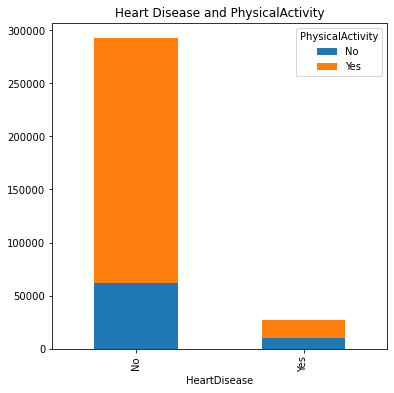

In [53]:
H_physical=pd.DataFrame(pd.crosstab(heart["HeartDisease"],heart["PhysicalActivity"])).reset_index()
ax=H_physical.plot(x="HeartDisease",kind='bar', stacked=True,
        title='Heart Disease and PhysicalActivity',figsize=(6,6))

* Heart disease and General Health

In [54]:
H_GenH=pd.DataFrame(pd.crosstab(heart["HeartDisease"],heart["GenHealth"],normalize="index"))
H_GenH

GenHealth,Excellent,Fair,Good,Poor,Very good
HeartDisease,,,,,
No,0.223451,0.094360,0.285789,0.025439,0.370960
Yes,0.054799,0.258795,0.349176,0.140650,0.196581


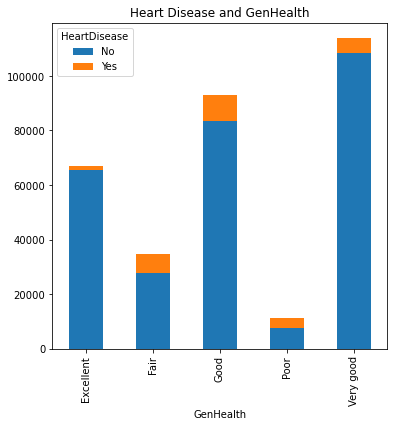

In [55]:
H_genHealth=pd.DataFrame(pd.crosstab(heart["GenHealth"],heart["HeartDisease"])).reset_index()
ax=H_genHealth.plot(x="GenHealth",kind='bar', stacked=True,
        title='Heart Disease and GenHealth',figsize=(6,6))

* Heart disease and sleeping time

In [56]:
bins = 8
edges = np.linspace(heart.SleepTime.min(), heart.SleepTime.max(), bins+1).astype(int)
labels = [f'({edges[i]}, {edges[i+1]})' for i in range(bins)]
Sleep_Heart=heart.copy()
Sleep_Heart["sleep_hrs"]=pd.cut(Sleep_Heart.SleepTime,bins=bins,labels=labels)
sleep_heart=pd.DataFrame(Sleep_Heart.groupby("sleep_hrs")["HeartDisease"].value_counts())
sleep_h=pd.crosstab(Sleep_Heart["sleep_hrs"],Sleep_Heart["HeartDisease"])
sleep_h

HeartDisease,No,Yes
sleep_hrs,,
"(1, 3)",2796,535
"(3, 6)",85018,8637
"(6, 9)",195015,16379
"(9, 12)",8762,1654
"(12, 15)",444,85
"(15, 18)",302,57
"(18, 21)",52,17
"(21, 24)",33,9


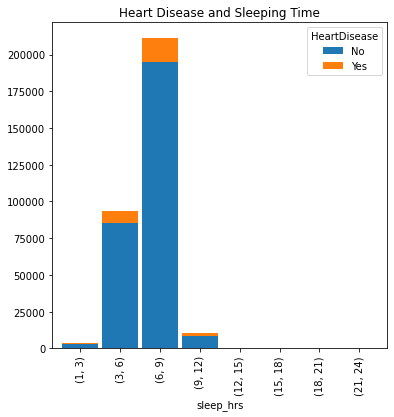

In [57]:
sleep_r=pd.crosstab(Sleep_Heart["sleep_hrs"],Sleep_Heart["HeartDisease"]).reset_index()
ax=sleep_r.plot(x="sleep_hrs",kind='bar', stacked=True,
        title='Heart Disease and Sleeping Time',figsize=(6,6),width=0.9)

* Heart disease and Asthma

In [58]:
H_Asthma=pd.DataFrame(pd.crosstab(heart["HeartDisease"],heart["Asthma"],normalize="index"))
H_Asthma

Asthma,No,Yes
HeartDisease,,
No,0.870259,0.129741
Yes,0.819786,0.180214


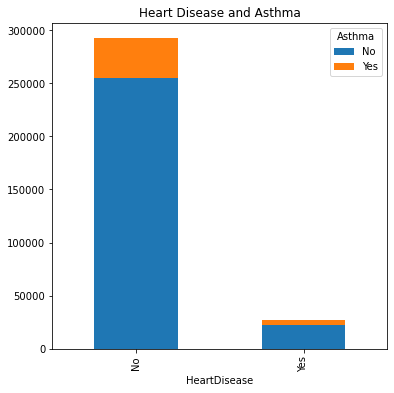

In [59]:
H_asthma=pd.DataFrame(pd.crosstab(heart["HeartDisease"],heart["Asthma"])).reset_index()
ax=H_asthma.plot(x="HeartDisease",kind='bar', stacked=True,
        title='Heart Disease and Asthma',figsize=(6,6))

* Heart disease and KidneyDisease

In [60]:
H_Kid=pd.DataFrame(pd.crosstab(heart["HeartDisease"],heart["KidneyDisease"],normalize="index"))
H_Kid

KidneyDisease,No,Yes
HeartDisease,,
No,0.971534,0.028466
Yes,0.873781,0.126219


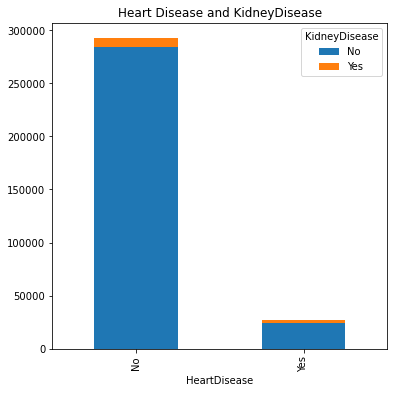

In [61]:
H_kid=pd.DataFrame(pd.crosstab(heart["HeartDisease"],heart["KidneyDisease"])).reset_index()
ax=H_kid.plot(x="HeartDisease",kind='bar', stacked=True,
        title='Heart Disease and KidneyDisease',figsize=(6,6))

* Heart Disease and SkinCancer

In [62]:
H_Skin=pd.DataFrame(pd.crosstab(heart["HeartDisease"],heart["SkinCancer"],normalize="index"))
H_Skin

SkinCancer,No,Yes
HeartDisease,,
No,0.915058,0.084942
Yes,0.818069,0.181931


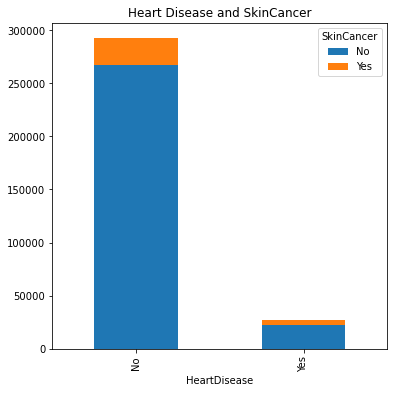

In [63]:
H_skin=pd.DataFrame(pd.crosstab(heart["HeartDisease"],heart["SkinCancer"])).reset_index()
ax=H_skin.plot(x="HeartDisease",kind='bar', stacked=True,
        title='Heart Disease and SkinCancer',figsize=(6,6))

#### Correlation

* Since most of the variables are categorical, One common option to handle this scenario is by first using one-hot encoding, and break each possible option of each categorical feature to 0-or-1 features. This will then allow the use of correlation, but it can easily become too complex to analyse

* What we need is something that will look like correlation, but will work with categorical values — or more formally, we’re looking for a measure of association between two categorical features

* The method used here is based on the article:\
https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9

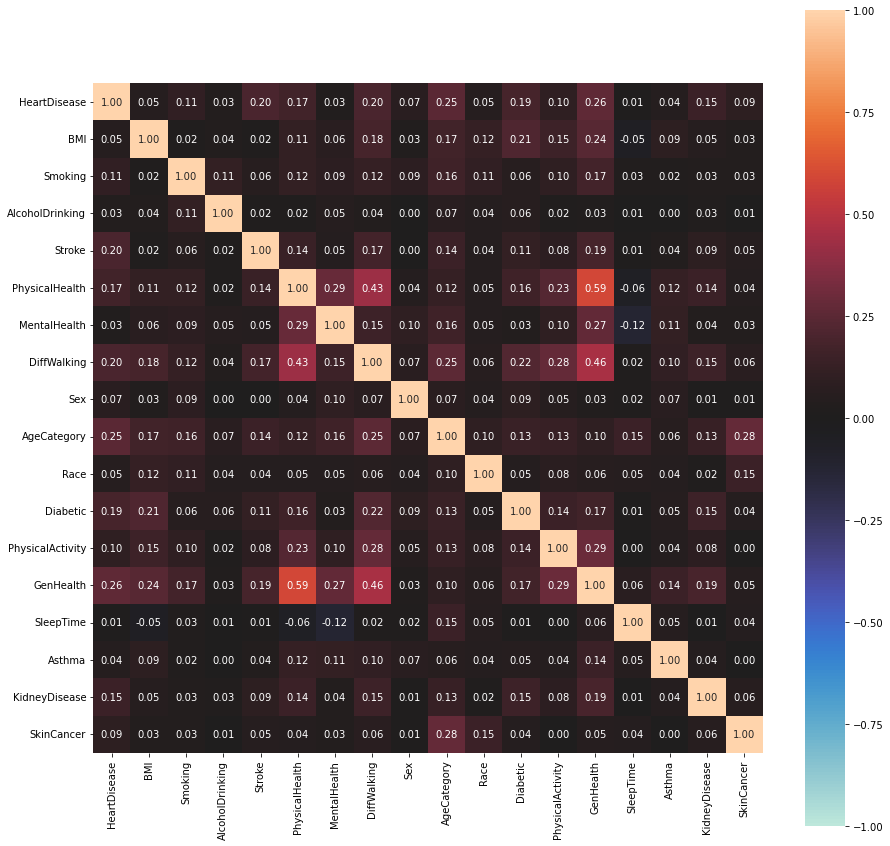

{'corr':                   HeartDisease       BMI   Smoking  AlcoholDrinking    Stroke  \
 HeartDisease          1.000000  0.051803  0.107738         0.032009  0.196798   
 BMI                   0.051803  1.000000  0.023118         0.038816  0.019733   
 Smoking               0.107738  0.023118  1.000000         0.111741  0.061184   
 AlcoholDrinking       0.032009  0.038816  0.111741         1.000000  0.019746   
 Stroke                0.196798  0.019733  0.061184         0.019746  1.000000   
 PhysicalHealth        0.170721  0.109788  0.115352         0.017254  0.137014   
 MentalHealth          0.028591  0.064131  0.085157         0.051282  0.046467   
 DiffWalking           0.201234  0.181678  0.120052         0.035265  0.174111   
 Sex                   0.070007  0.026940  0.085028         0.003796  0.002515   
 AgeCategory           0.245588  0.170749  0.164059         0.069702  0.143594   
 Race                  0.051230  0.118244  0.108177         0.040267  0.040646   
 Diabeti

In [3]:
associations(heart,figsize=(15, 15))